In [71]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os


In [72]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip 

--2021-07-19 15:36:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.01MB/s    in 61s     

2021-07-19 15:38:00 (5.08 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [74]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [76]:
pip install split-folders

In [75]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [83]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 4076.40 files/s]


In [110]:
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

In [123]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [124]:
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)

In [125]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [126]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.4,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.4,
                    fill_mode = 'nearest')

In [127]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [141]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [143]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [144]:
model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2
    )

Epoch 1/20
20/20 - 29s - loss: 1.0349 - accuracy: 0.4563 - val_loss: 0.7397 - val_accuracy: 0.7437
Epoch 2/20
20/20 - 29s - loss: 0.6382 - accuracy: 0.7500 - val_loss: 0.5598 - val_accuracy: 0.7812
Epoch 3/20
20/20 - 29s - loss: 0.3360 - accuracy: 0.8813 - val_loss: 0.2725 - val_accuracy: 0.8875
Epoch 4/20
20/20 - 29s - loss: 0.2098 - accuracy: 0.9203 - val_loss: 0.3549 - val_accuracy: 0.8750
Epoch 5/20
20/20 - 28s - loss: 0.2713 - accuracy: 0.9172 - val_loss: 0.2342 - val_accuracy: 0.9187
Epoch 6/20
20/20 - 28s - loss: 0.1975 - accuracy: 0.9359 - val_loss: 0.1291 - val_accuracy: 0.9500
Epoch 7/20
20/20 - 28s - loss: 0.1588 - accuracy: 0.9359 - val_loss: 0.1987 - val_accuracy: 0.9250
Epoch 8/20
20/20 - 28s - loss: 0.2043 - accuracy: 0.9359 - val_loss: 0.1920 - val_accuracy: 0.9312
Epoch 9/20
20/20 - 28s - loss: 0.1430 - accuracy: 0.9547 - val_loss: 0.3355 - val_accuracy: 0.8875
Epoch 10/20
20/20 - 28s - loss: 0.1476 - accuracy: 0.9500 - val_loss: 0.1174 - val_accuracy: 0.9563
Epoch 11/

Saving batuuu.png to batuuu (4).png
batuuu.png
1
batu


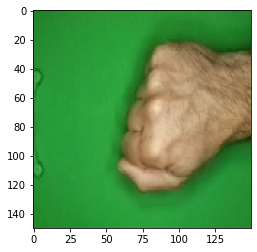

In [168]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
pred_indices = train_generator.classes

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  hasil = np.argmax(classes)
  print(fn)
  print(hasil)
  if hasil == 0:
    print('kertas')
  elif hasil == 1:
    print('batu')
  elif hasil == 2:
    print('gunting')